In [10]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Create an instance 

In [11]:
model = ConcreteModel("Multiobjective Optimization")

#### Decision variables

In [12]:
model.x1=Var(domain = NonNegativeReals)
model.x2=Var(domain = NonNegativeReals)

#### Parameters

In [13]:
model.w = Param(initialize = 1.0, mutable=True)
model.w.pprint()

w : Size=1, Index=None, Domain=Any, Default=None, Mutable=True
    Key  : Value
    None :   1.0


#### Objective function

In [14]:
weightage_list = np.linspace(0.0, 1.0, 6)
print(weightage_list)

[0.  0.2 0.4 0.6 0.8 1. ]


In [15]:
# weighted sum
model.obj1 = Objective(expr = model.w*((model.x1 - 5)**2 + (model.x2 - 5)**2) + \
                              (1-model.w)*((model.x1 - 10)**2 + (model.x2 - 10)**2), sense=minimize)
model.obj1.pprint()

obj1 : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : w*((x1 - 5)**2 + (x2 - 5)**2) + (1 - w)*((x1 - 10)**2 + (x2 - 10)**2)


#### Run

In [16]:
solutions = []
obj1 = []
obj2 = []
for w in weightage_list: 
    model.w = w
    SolverFactory('ipopt').solve(model)
    solutions.append([model.x1(), model.x2()])
    obj1_temp = (model.x1() - 5)**2 + (model.x2() - 5)**2
    obj2_temp = (model.x1() - 10)**2 + (model.x2() - 10)**2
    obj1.append(value(obj1_temp))
    obj2.append(value(obj2_temp))

#### Results

In [17]:
# store results in dataframe 
results = pd.DataFrame()
results['w1'] = weightage_list
results['w2'] = (1-weightage_list)
results[['x1', 'x2']] = solutions
results['f1'] = [round(v, 2) for v in obj1]
results['f2'] = [round(v, 2) for v in obj2]

pd.set_option("display.precision", 2)
results

,w1,w2,x1,x2,f1,f2
0,0.0,1.0,10.0,10.0,50.0,0.0
1,0.2,0.8,9.0,9.0,32.0,2.0
2,0.4,0.6,8.0,8.0,18.0,8.0
3,0.6,0.4,7.0,7.0,8.0,18.0
4,0.8,0.2,6.0,6.0,2.0,32.0
5,1.0,0.0,5.0,5.0,0.0,50.0


#### Plot efficient frontier 

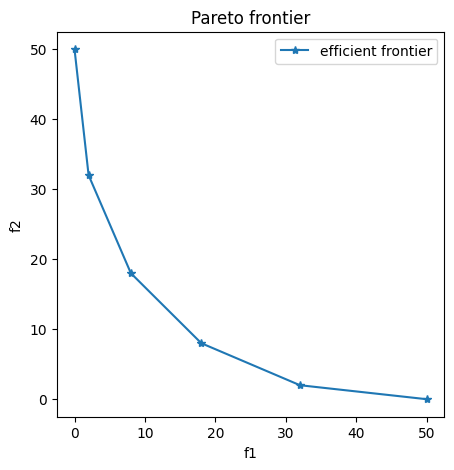

In [18]:
# plot efficient frontier
fig, ax = plt.subplots(figsize = (5, 5))
plt.plot(obj1, obj2, marker = '*', label='efficient frontier')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Pareto frontier')
plt.legend()
plt.show()